In [8]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

unem_data = pf.get_series(series_id="UNRATE", api_key=api_key)

print(unem_data)

unem_info = pf.get_series_info(series_id="UNRATE", api_key=api_key)

    realtime_start realtime_end       date  value
0       2023-05-13   2023-05-13 1948-01-01    3.4
1       2023-05-13   2023-05-13 1948-02-01    3.8
2       2023-05-13   2023-05-13 1948-03-01    4.0
3       2023-05-13   2023-05-13 1948-04-01    3.9
4       2023-05-13   2023-05-13 1948-05-01    3.5
..             ...          ...        ...    ...
899     2023-05-13   2023-05-13 2022-12-01    3.5
900     2023-05-13   2023-05-13 2023-01-01    3.4
901     2023-05-13   2023-05-13 2023-02-01    3.6
902     2023-05-13   2023-05-13 2023-03-01    3.5
903     2023-05-13   2023-05-13 2023-04-01    3.4

[904 rows x 4 columns]


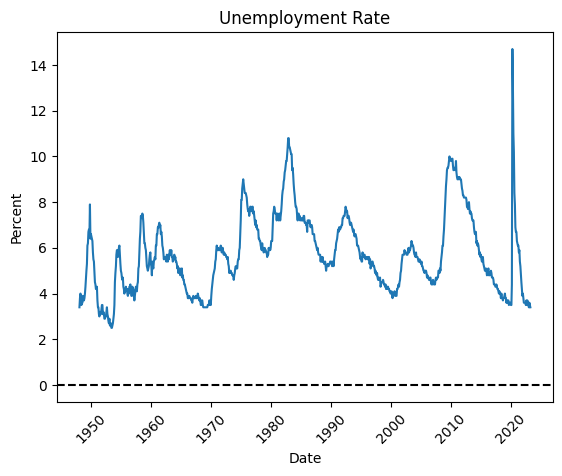

In [16]:
# Convert the "date" column to datetime format
unem_data['date'] = pd.to_datetime(unem_data['date'])

# Plot the graph
plt.plot(unem_data['date'], unem_data['value'])
plt.xlabel('Date')
plt.ylabel(unem_info.units)
plt.title(unem_info.title)
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

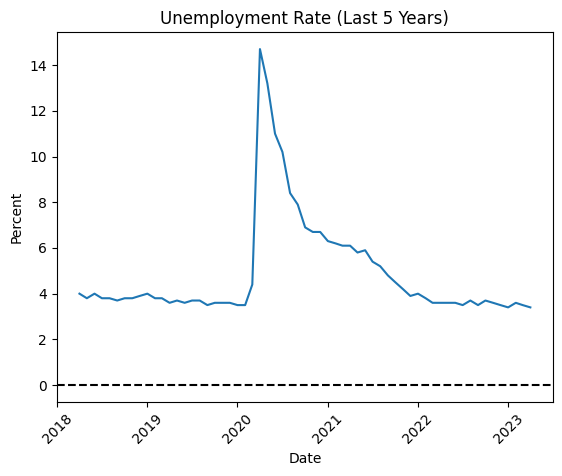

In [17]:
# Convert the "date" column to datetime format
unem_data['date'] = pd.to_datetime(unem_data['date'])

# Filter the DataFrame for the last 5 years
last_5_years_data = unem_data[unem_data['date'] >= unem_data['date'].max() - pd.DateOffset(years=5)]

# Plot the graph with data from the last 5 years
plt.plot(last_5_years_data['date'], last_5_years_data['value'])
plt.xlabel('Date')
plt.ylabel(unem_info.units)
plt.title(unem_info.title + ' (Last 5 Years)')
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [11]:
# Convert DataFrame to JSON
unem_json = unem_data.to_json(orient='records')

# Parse the JSON
data = json.loads(unem_json)

# Get the last item
last_item = data[-1]

print(str(unem_info.title) + ": " + str(last_item['value']) + "% | Last Updated: " + str(unem_info.last_updated))

Unemployment Rate: 3.4% | Last Updated: 2023-05-05 07:44:02-05


In [12]:
print("Info: " + str(unem_info.id))
print("Title: " + str(unem_info.title))
print("Frequency: " + str(unem_info.frequency))
print("Units: " + str(unem_info.units))
print("Last Updated: " + str(unem_info.last_updated))
print("Popularity: " + str(unem_info.popularity))
print("Notes: " + str(unem_info.notes))

Info: UNRATE
Title: Unemployment Rate
Frequency: Monthly
Units: Percent
Last Updated: 2023-05-05 07:44:02-05
Popularity: 95
Notes: The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.

This rate is also defined as the U-3 measure of labor underutilization.

The series comes from the 'Current Population Survey (Household Survey)'

The source code is: LNS14000000
